# SKENARIO 5

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv('/content/drive/MyDrive/bootcamp/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
numer =['Age',	'DailyRate',	'DistanceFromHome',	'Education',	'EmployeeCount',	'EmployeeNumber',	'EnvironmentSatisfaction',	'HourlyRate',	'JobInvolvement',	'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 	'RelationshipSatisfaction',	'StandardHours',	'StockOptionLevel',	'TotalWorkingYears',	'TrainingTimesLastYear',	'WorkLifeBalance',	'YearsAtCompany',	'YearsInCurrentRole',	'YearsSinceLastPromotion',	'YearsWithCurrManager']
objek = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

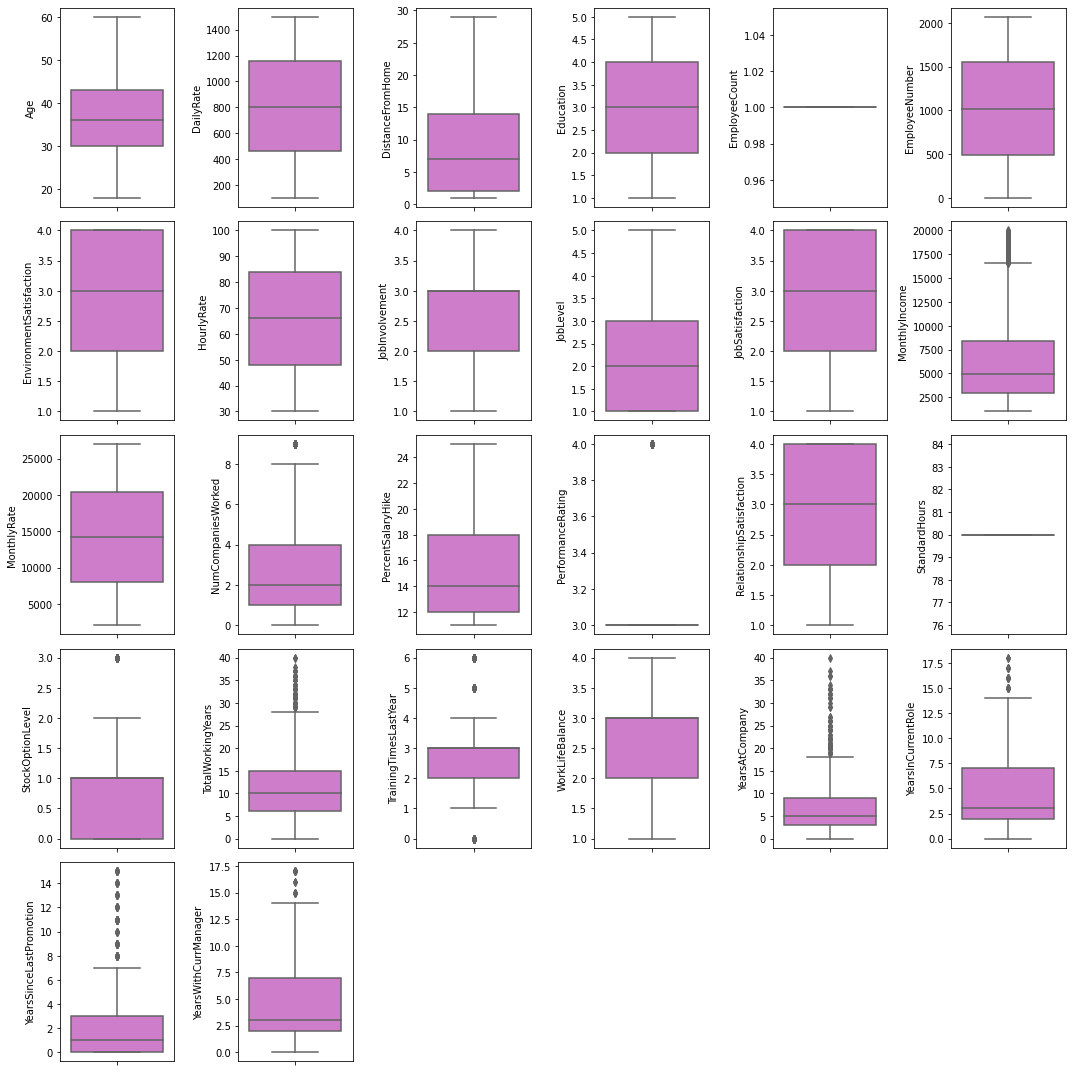

In [ ]:
features = numer
plt.figure(figsize=(15, 15))
for i in range(0, len(features)):
    plt.subplot(5, 6,  i+1)
    sns.boxplot(y=df[features[i]], color='orchid', orient='v')
    plt.tight_layout()

In [ ]:
data = df[['MonthlyIncome','NumCompaniesWorked','StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
atas = Q3 + (1.5*IQR)
bawah = Q1 - (1.5*IQR)

df1 = df[((data >= bawah) & (data <= atas)).all(axis=1)]

In [ ]:
df1.shape

(925, 35)

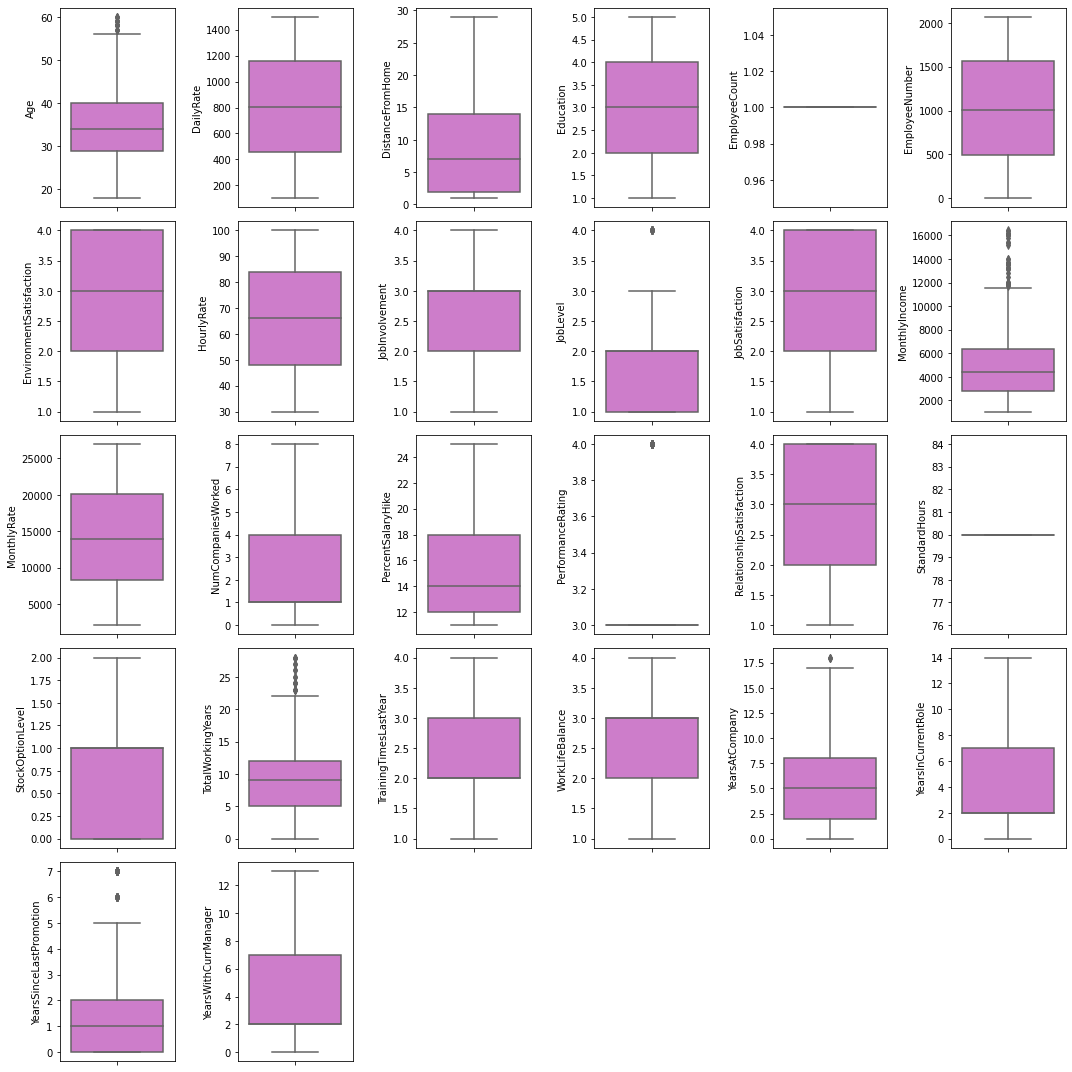

In [ ]:
features = numer
plt.figure(figsize=(15, 15))
for i in range(0, len(features)):
    plt.subplot(5, 6,  i+1)
    sns.boxplot(y=df1[features[i]], color='orchid', orient='v')
    plt.tight_layout()

### Scalling

In [ ]:
#standarisasi
features = ['Age', 'DailyRate', 'Education', 'JobLevel', 'MonthlyIncome']

for var in features:
    df1[var]= (df1[var]+1).apply(np.log)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
for var in features:
    df1[var]= StandardScaler().fit_transform(df1[var].values.reshape(len(df1), 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [ ]:
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,9.250000e+02,9.250000e+02,925.000000,9.250000e+02,925.0,925.000000,925.000000,925.000000,925.000000,9.250000e+02,...,925.000000,925.0,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000
mean,-1.017047e-15,-5.902186e-17,9.331892,-2.491701e-16,1.0,1029.521081,2.727568,65.976216,2.739459,3.756755e-17,...,2.684324,80.0,0.672432,9.007568,2.523243,2.753514,5.429189,3.589189,1.417297,3.547027
std,1.000541e+00,1.000541e+00,8.143937,1.000541e+00,0.0,605.531469,1.084796,20.475978,0.711843,1.000541e+00,...,1.086030,0.0,0.688297,5.252390,0.746384,0.723598,3.681093,3.049713,1.970816,3.041773
min,-2.645446e+00,-2.823982e+00,1.000000,-2.117801e+00,1.0,2.000000,1.000000,30.000000,1.000000,-1.056161e+00,...,1.000000,80.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.057812e-01,-5.648055e-01,2.000000,-7.454138e-01,1.0,498.000000,2.000000,48.000000,2.000000,-1.056161e+00,...,2.000000,80.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,-5.116682e-02,2.726889e-01,7.000000,2.283100e-01,1.0,1007.000000,3.000000,66.000000,3.000000,4.717616e-01,...,3.000000,80.0,1.000000,9.000000,2.000000,3.000000,5.000000,2.000000,1.000000,2.000000
75%,6.207453e-01,8.273345e-01,14.000000,9.835889e-01,1.0,1568.000000,4.000000,84.000000,3.000000,4.717616e-01,...,4.000000,80.0,1.000000,12.000000,3.000000,3.000000,8.000000,7.000000,2.000000,7.000000
max,2.307922e+00,1.218370e+00,29.000000,1.600697e+00,1.0,2068.000000,4.000000,100.000000,4.000000,2.396717e+00,...,4.000000,80.0,2.000000,28.000000,4.000000,4.000000,18.000000,14.000000,7.000000,13.000000


### Feature Encoding

In [ ]:
#one hot encoding
Gender = {
    'Female' : 0,
    'Male' : 1
}
Attrition = {
    'No' : 0,
    'Yes' : 1
}
Overtime = {
    'No' : 0,
    'Yes' : 1
}
travel = {
    'Travel_Frequently':2,
    'Travel_Rarely':1,
    'Non-Travel':0
  }
over18 = {
      'Y' : 1
  }

df1['Over18'] = df1['Over18'].map(over18)
df1['BusinessTravel'] = df1['BusinessTravel'].map(travel)
df1['Gender'] = df1['Gender'].map(Gender)
df1['Attrition'] = df1['Attrition'].map(Attrition)
df1['OverTime'] = df1['OverTime'].map(Overtime)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
for cat in ['JobRole', 'Department', 'EducationField', 'MaritalStatus']:
    onehots = pd.get_dummies(df1[cat], prefix=cat)
    df1 = df1.join(onehots)

In [ ]:
df1 = df1.drop(columns=['JobRole', 'Department', 'EducationField', 'MaritalStatus'])

### Transformation

In [ ]:
#no

### Selection

In [ ]:
x = df1.drop(columns=['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber', 'Attrition'])
y = df1['Attrition'].values
print(x.shape)
print(y.shape)

(925, 47)
(925,)


In [ ]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1,1.463485,0,2,-1.323496,8,-2.117801,1,2,3,1,...,0,0,1,0,0,0,0,0,1,0
2,0.298064,1,1,1.086453,2,-0.745414,1,4,4,1,...,0,0,0,0,0,1,0,0,0,1
3,-0.174265,0,2,1.107260,3,0.983589,1,5,4,0,...,0,0,1,0,0,0,0,0,1,0
5,-0.301038,0,2,0.614151,2,-0.745414,1,8,4,1,...,0,0,1,0,0,0,0,0,0,1
7,-0.566536,0,1,1.069823,24,-2.117801,1,11,4,1,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
#split dulu
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

### Balancing

In [ ]:
#smote 
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
print('SMOTE')
print(pd.Series(y).value_counts())

SMOTE
0    762
1    762
dtype: int64


In [ ]:
x.describe()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,...,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000
mean,-0.193348,1.075459,-0.057425,9.744751,-0.045505,2.477034,0.523622,65.666010,2.548556,-0.182529,...,0.239501,0.010499,0.318241,0.081365,0.197507,0.046588,0.064304,0.125984,0.334646,0.337270
std,0.977208,0.493106,0.947184,7.672024,0.948894,1.076885,0.499606,19.056659,0.729910,0.932173,...,0.426919,0.101957,0.465947,0.273484,0.398248,0.210824,0.245375,0.331941,0.472021,0.472933
min,-2.645446,0.000000,-2.823982,1.000000,-2.117801,1.000000,0.000000,30.000000,1.000000,-1.056161,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.834922,1.000000,-0.629115,3.000000,-0.745414,2.000000,0.000000,50.000000,2.000000,-1.056161,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.219021,1.000000,0.127205,8.000000,0.228310,3.000000,1.000000,65.000000,3.000000,-0.388513,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.408372,1.000000,0.731472,15.000000,0.692516,3.000000,1.000000,81.000000,3.000000,0.471762,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.307922,2.000000,1.218370,29.000000,1.600697,4.000000,1.000000,100.000000,4.000000,2.396717,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Confusion Matrix**

Accuracy = 0.89
Recall = 0.25



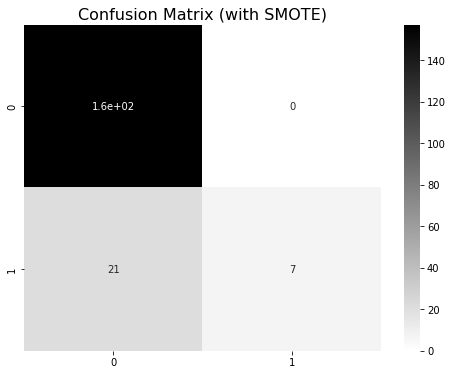

In [ ]:
#confusion matrix pake random forest
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rf = RandomForestClassifier(random_state=42)

rf.fit(x_train, y_train)
preds = rf.predict(x_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='gist_yarg');

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy = 0.87
Recall = 0.29



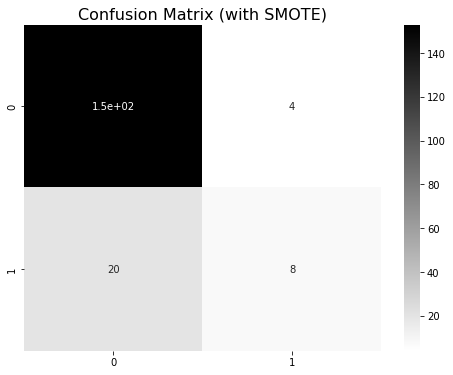

In [ ]:
#Confusion matrix pake logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)

lr.fit(x_train, y_train)
preds = lr.predict(x_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='gist_yarg');

Accuracy = 0.76
Recall = 0.36



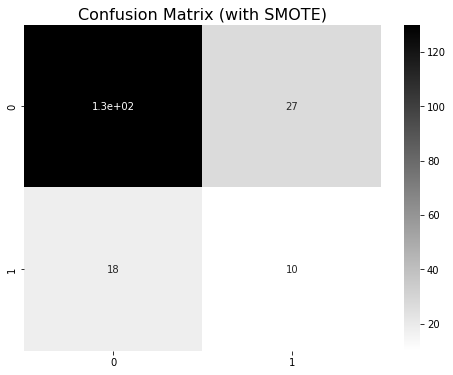

In [ ]:
#confusion matrix pake decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

dt.fit(x_train, y_train)
preds = dt.predict(x_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='gist_yarg');

### Model

In [ ]:
#function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
    print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

### Model Evaluation

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
eval_classification(lr)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.84
Precision (Test Set): 0.67
Precision (Train Set): 0.63
Recall (Test Set): 0.29
Recall (Train Set): 0.24
F1-Score (Test Set): 0.40
F1-Score (Train Set): 0.35
AUC (test-proba): 0.83
AUC (train-proba): 0.80
AUC (test-label): 0.63
AUC (train-label): 0.61


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print('Train score: ' + str(lr.score(x_train, y_train))) #accuracy
print('Test score:' + str(lr.score(x_test, y_test))) #accuracy

Train score: 0.8364864864864865
Test score:0.8702702702702703


**Overfitt tapi dikit bgt bgt**

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.76
Accuracy (Train Set): 1.00
Precision (Test Set): 0.27
Precision (Train Set): 1.00
Recall (Test Set): 0.36
Recall (Train Set): 1.00
F1-Score (Test Set): 0.31
F1-Score (Train Set): 1.00
AUC (test-proba): 0.59
AUC (train-proba): 1.00
AUC (test-label): 0.59
AUC (train-label): 1.00


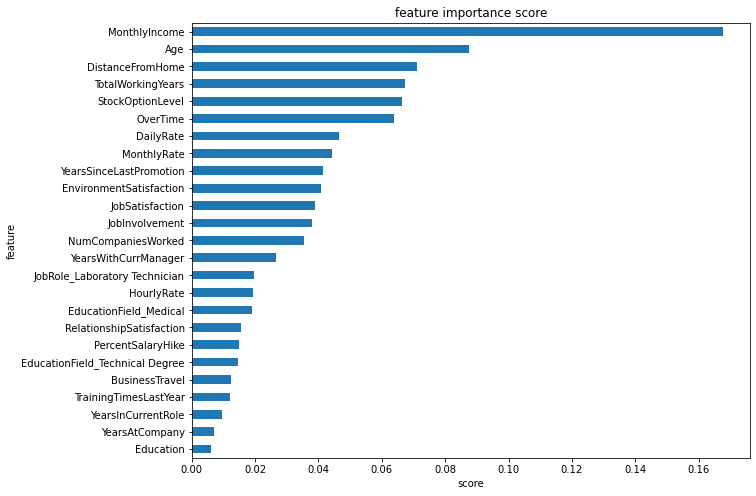

In [ ]:
show_feature_importance(dt)

In [ ]:
print('Train score: ' + str(dt.score(x_train, y_train))) #accuracy
print('Test score:' + str(dt.score(x_test, y_test))) #accuracy

Train score: 1.0
Test score:0.7567567567567568


**Overfitt**

In [ ]:
#random forest
eval_classification(rf)

Accuracy (Test Set): 0.89
Accuracy (Train Set): 1.00
Precision (Test Set): 1.00
Precision (Train Set): 1.00
Recall (Test Set): 0.25
Recall (Train Set): 1.00
F1-Score (Test Set): 0.40
F1-Score (Train Set): 1.00
AUC (test-proba): 0.83
AUC (train-proba): 1.00
AUC (test-label): 0.62
AUC (train-label): 1.00


In [ ]:
print('Train score: ' + str(rf.score(x_train, y_train))) #accuracy
print('Test score:' + str(rf.score(x_test, y_test))) #accuracy

Train score: 1.0
Test score:0.8864864864864865


**Overfitt tapi ga segede random decision tree**

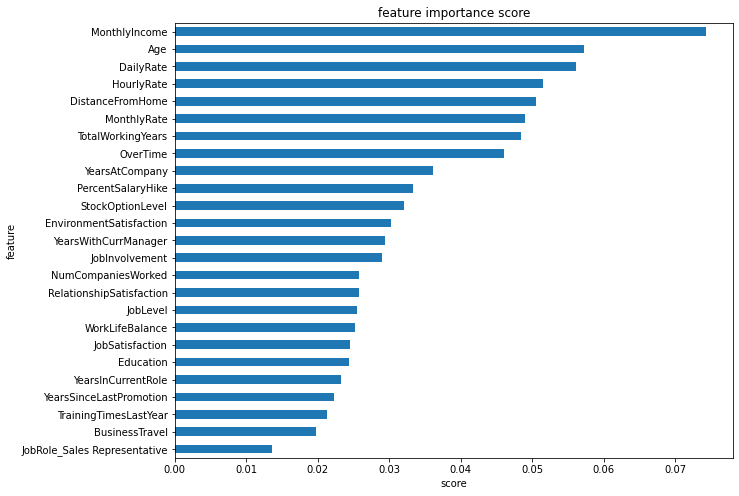

In [ ]:
show_feature_importance(rf)

### Tuning hyperparams

In [ ]:
#Hyperparams logistic regression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

rs = RandomizedSearchCV(lr, hyperparameters, cv=5, scoring='recall')

rs.fit(x_train, y_train)
y_pred = rs.predict(x_test)
eval_classification(rs)

The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter

Accuracy (Test Set): 0.85
Accuracy (Train Set): 0.82
Precision (Test Set): 1.00
Precision (Train Set): 1.00
Recall (Test Set): 0.04
Recall (Train Set): 0.02
F1-Score (Test Set): 0.07
F1-Score (Train Set): 0.04
AUC (test-proba): 0.78
AUC (train-proba): 0.74
AUC (test-label): 0.52
AUC (train-label): 0.51


In [ ]:
print('Train score: ' + str(rs.score(x_train, y_train))) #accuracy
print('Test score:' + str(rs.score(x_test, y_test))) #accuracy

Train score: 0.8216216216216217
Test score:0.8540540540540541


**Overfitt dikit**

In [ ]:
#Hyperparams decision tree
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 710, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100, 200, 220, 250] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50, 75, 90] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
rsc = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
rsc.fit(x_train, y_train)

# Predict & Evaluation
y_pred = rsc.predict(x_test)#Check performa dari model
eval_classification(rsc)

Accuracy (Test Set): 0.79
Accuracy (Train Set): 0.90
Precision (Test Set): 0.29
Precision (Train Set): 0.80
Recall (Test Set): 0.25
Recall (Train Set): 0.58
F1-Score (Test Set): 0.27
F1-Score (Train Set): 0.67
AUC (test-proba): 0.64
AUC (train-proba): 0.95
AUC (test-label): 0.57
AUC (train-label): 0.77


In [ ]:
print('Train score: ' + str(rsc.score(x_train, y_train))) #accuracy
print('Test score:' + str(rsc.score(x_test, y_test))) #accuracy

Train score: 0.8296296296296296
Test score:0.35714285714285715


**Masih Overfit**

### Shap

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 4.9 MB/s 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

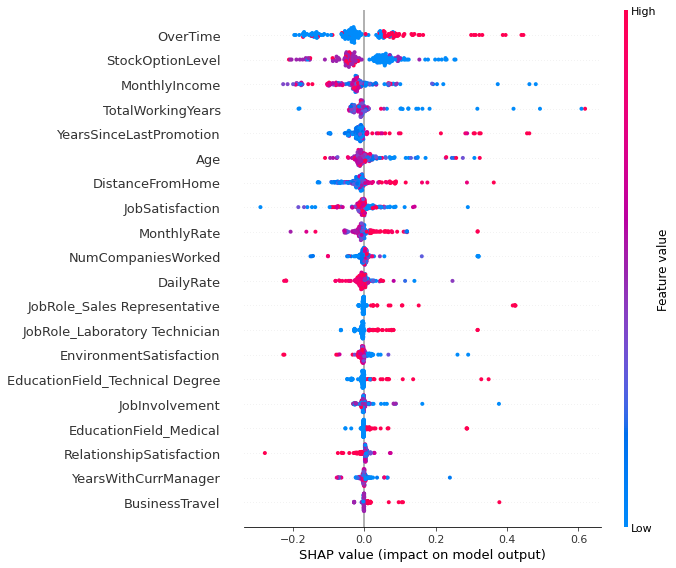

In [ ]:
import shap
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values[1], x_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0:1], x_test.iloc[0,:])

## Feature Importance

In [ ]:
x = df1[['MonthlyIncome', 'Age', 'DistanceFromHome', 'TotalWorkingYears', 'StockOptionLevel']]
y = df1['Attrition'].values
print(x.shape)
print(y.shape)

(925, 5)
(925,)


In [ ]:
#split dulu
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
#smote 
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
print('SMOTE')
print(pd.Series(y).value_counts())

SMOTE
0    762
1    762
dtype: int64


In [ ]:
x.describe()

,MonthlyIncome,Age,DistanceFromHome,TotalWorkingYears,StockOptionLevel
count,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000
mean,-0.202210,-0.182244,9.771654,7.940289,0.459974
std,1.009217,1.008602,8.180680,5.132363,0.634196
min,-2.641276,-2.645446,1.000000,0.000000,0.000000
25%,-1.021411,-0.828817,2.000000,5.000000,0.000000
50%,-0.253101,-0.174265,8.000000,7.000000,0.000000
75%,0.496875,0.408372,15.000000,10.000000,1.000000
max,2.444629,2.307922,29.000000,28.000000,2.000000


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

Accuracy = 0.77
Recall = 0.32



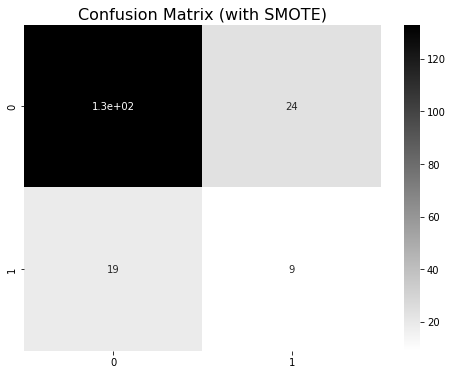

In [34]:
#confusion matrix pake decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(x_train, y_train)
preds = dt.predict(x_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='gist_yarg');

In [35]:
#function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
    print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [36]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.74
Accuracy (Train Set): 1.00
Precision (Test Set): 0.19
Precision (Train Set): 1.00
Recall (Test Set): 0.21
Recall (Train Set): 1.00
F1-Score (Test Set): 0.20
F1-Score (Train Set): 1.00
AUC (test-proba): 0.52
AUC (train-proba): 1.00
AUC (test-label): 0.52
AUC (train-label): 1.00


In [ ]:
print('Train score: ' + str(dt.score(x_train, y_train))) #accuracy
print('Test score:' + str(dt.score(x_test, y_test))) #accuracy

Train score: 1.0
Test score:0.7405405405405405


In [ ]:
#Hyperparams decision tree
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 710, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100, 200, 220, 250] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50, 75, 90] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
rsc = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
rsc.fit(x_train, y_train)

# Predict & Evaluation
y_pred = rsc.predict(x_test)#Check performa dari model
eval_classification(rsc)

Accuracy (Test Set): 0.79
Accuracy (Train Set): 0.88
Precision (Test Set): 0.25
Precision (Train Set): 0.74
Recall (Test Set): 0.18
Recall (Train Set): 0.54
F1-Score (Test Set): 0.21
F1-Score (Train Set): 0.62
AUC (test-proba): 0.59
AUC (train-proba): 0.94
AUC (test-label): 0.54
AUC (train-label): 0.75


In [ ]:
print('Train score: ' + str(rsc.score(x_train, y_train))) #accuracy
print('Test score:' + str(rsc.score(x_test, y_test))) #accuracy

Train score: 0.5407407407407407
Test score:0.17857142857142858


In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 4.3 MB/s 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

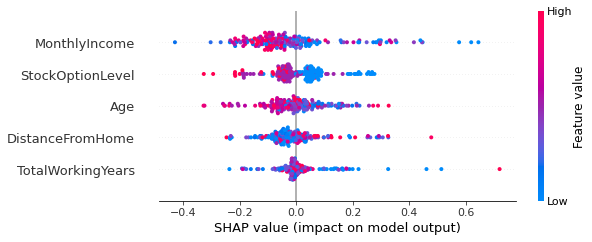

In [ ]:
import shap
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values[1], x_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0:1], x_test.iloc[0,:])

# SKENARIO 4

##Import All

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import drive
drive.mount ('/content/drive')

df=pd.read_csv('/content/drive/MyDrive/bootcamp/DF_FT.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Kesesuaian Karir_Other,Kesesuaian Karir_Sesuai,Kesesuaian Karir_Tidak Sesuai
0,41,1,1,1102,1,2,1,2,0,94,...,0,0,0,0,0,0,1,0,0,1
1,49,0,2,279,8,1,2,3,1,61,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1,1373,2,2,4,4,1,92,...,0,0,1,0,0,0,1,1,0,0
3,33,0,2,1392,3,4,5,4,0,56,...,0,0,0,0,0,1,0,0,1,0
4,27,0,1,591,2,1,7,1,1,40,...,0,1,0,0,0,1,0,0,0,1


## Cleansing

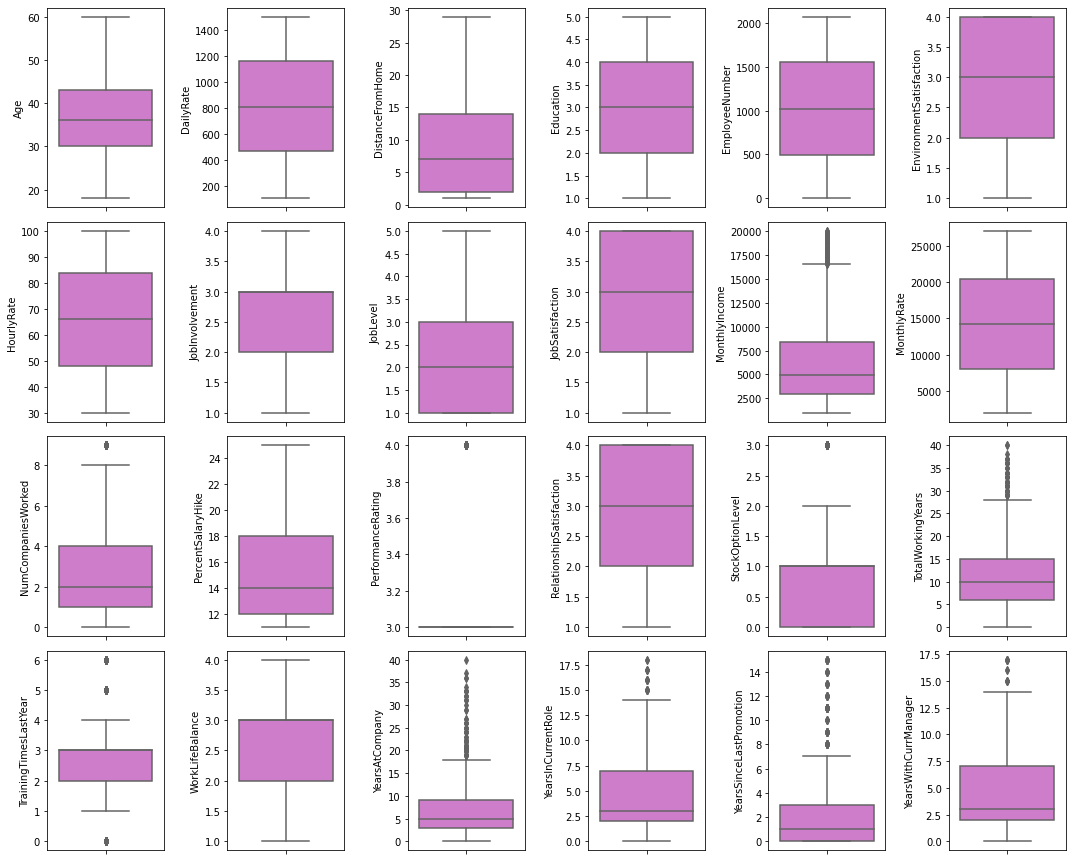

In [7]:
numer =['Age',	'DailyRate',	'DistanceFromHome',	
        'Education',	'EmployeeNumber',	'EnvironmentSatisfaction',	
        'HourlyRate',	'JobInvolvement',	'JobLevel', 'JobSatisfaction', 
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
        'PerformanceRating', 	'RelationshipSatisfaction',	'StockOptionLevel',	
        'TotalWorkingYears',	'TrainingTimesLastYear',	'WorkLifeBalance',	
        'YearsAtCompany',	'YearsInCurrentRole',	'YearsSinceLastPromotion',	'YearsWithCurrManager']

features = numer
plt.figure(figsize=(15, 15))
for i in range(0, len(features)):
    plt.subplot(5, 6,  i+1)
    sns.boxplot(y=df[features[i]], color='orchid', orient='v')
    plt.tight_layout()

In [8]:
data = df[['MonthlyIncome','NumCompaniesWorked','StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
atas = Q3 + (1.5*IQR)
bawah = Q1 - (1.5*IQR)

df1 = df[((data >= (Q1 - 1.5 * IQR)) & (data <= (Q3 + 1.5 * IQR))).all(axis=1)]

In [9]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,925.0,35.416216,8.628501,18.0,29.000000,34.000000,40.000000,60.0
Attrition,925.0,0.176216,0.381210,0.0,0.000000,0.000000,0.000000,1.0
BusinessTravel,925.0,1.099459,0.527234,0.0,1.000000,1.000000,1.000000,2.0
DailyRate,925.0,799.051892,402.137500,103.0,461.000000,802.000000,1157.000000,1498.0
DistanceFromHome,925.0,9.331892,8.143937,1.0,2.000000,7.000000,14.000000,29.0
Education,925.0,2.891892,1.023104,1.0,2.000000,3.000000,4.000000,5.0
EmployeeNumber,925.0,1029.521081,605.531469,2.0,498.000000,1007.000000,1568.000000,2068.0
EnvironmentSatisfaction,925.0,2.727568,1.084796,1.0,2.000000,3.000000,4.000000,4.0
Gender,925.0,0.618378,0.486047,0.0,0.000000,1.000000,1.000000,1.0
HourlyRate,925.0,65.976216,20.475978,30.0,48.000000,66.000000,84.000000,100.0


In [10]:
## Skew positive
df1[numer].mean()>df1[numer].median()

Age                          True
DailyRate                   False
DistanceFromHome             True
Education                   False
EmployeeNumber               True
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobSatisfaction             False
MonthlyIncome                True
MonthlyRate                  True
NumCompaniesWorked           True
PercentSalaryHike            True
PerformanceRating            True
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears            True
TrainingTimesLastYear        True
WorkLifeBalance             False
YearsAtCompany               True
YearsInCurrentRole           True
YearsSinceLastPromotion      True
YearsWithCurrManager         True
dtype: bool

In [11]:
positif = ['Age', 'DistanceFromHome', 'MonthlyIncome', 
           'MonthlyRate', 'PercentSalaryHike', 
           'TrainingTimesLastYear']

In [12]:
## Skew negative
negatif = ['DailyRate', 'HourlyRate']

In [13]:
#STANDARISASI

from sklearn.preprocessing import MinMaxScaler, StandardScaler

df1['DailyRate'] = StandardScaler().fit_transform(df1['DailyRate'].values.reshape(len(df1), 1))
df1['HourlyRate'] = StandardScaler().fit_transform(df1['HourlyRate'].values.reshape(len(df1), 1))

df['NumCompaniesWorked'] = StandardScaler().fit_transform(df['NumCompaniesWorked'].values.reshape(len(df), 1))
df['TotalWorkingYears'] = StandardScaler().fit_transform(df['TotalWorkingYears'].values.reshape(len(df), 1))
df['YearsInCurrentRole'] = StandardScaler().fit_transform(df['YearsInCurrentRole'].values.reshape(len(df), 1))
df['YearsSinceLastPromotion'] = StandardScaler().fit_transform(df['YearsSinceLastPromotion'].values.reshape(len(df), 1))
df['YearsWithCurrManager'] = StandardScaler().fit_transform(df['YearsWithCurrManager'].values.reshape(len(df), 1))
df['YearsAtCompany'] = StandardScaler().fit_transform(df['YearsAtCompany'].values.reshape(len(df), 1))

In [14]:
df1[positif] = np.log(df1[positif])

In [15]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,925.0,3.537917e+00,0.242692,2.890372,3.367296,3.526361,3.688879,4.094345
Attrition,925.0,1.762162e-01,0.381210,0.000000,0.000000,0.000000,0.000000,1.000000
BusinessTravel,925.0,1.099459e+00,0.527234,0.000000,1.000000,1.000000,1.000000,2.000000
DailyRate,925.0,1.064014e-16,1.000541,-1.731817,-0.841092,0.007335,0.890595,1.739023
DistanceFromHome,925.0,1.757100e+00,1.067846,0.000000,0.693147,1.945910,2.639057,3.367296
Education,925.0,2.891892e+00,1.023104,1.000000,2.000000,3.000000,4.000000,5.000000
EmployeeNumber,925.0,1.029521e+03,605.531469,2.000000,498.000000,1007.000000,1568.000000,2068.000000
EnvironmentSatisfaction,925.0,2.727568e+00,1.084796,1.000000,2.000000,3.000000,4.000000,4.000000
Gender,925.0,6.183784e-01,0.486047,0.000000,0.000000,1.000000,1.000000,1.000000
HourlyRate,925.0,2.616526e-17,1.000541,-1.757947,-0.878392,0.001162,0.880717,1.662543


## Split Data

In [16]:
dfs = df1.drop('EmployeeNumber', axis=1)

In [17]:
dfs['att_class'] = dfs['Attrition'] == 1
dfs['att_class'].value_counts()

False    762
True     163
Name: att_class, dtype: int64

In [18]:
X = dfs[[col for col in dfs.columns if (str(dfs[col].dtype) != 'object') and col not in ['Attrition', 'att_class']]]
Y = dfs['att_class'].values
print(X.shape)
print(Y.shape)

(925, 51)
(925,)


In [19]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## function

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    
    print('Train score: ' + str(model.score(x_train, y_train))) #accuracy
    print('Test score:' + str(model.score(x_test, y_test))) #accuracy
#     print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
#     print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Balancing

In [21]:
print('Original')
print(pd.Series(y_train).value_counts())

Original
False    605
True     135
dtype: int64


In [22]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1).fit_resample(x_train, y_train)
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

SMOTE
False    605
True     605
dtype: int64


## Model1 : Logistic Regression

In [ ]:
# LOGREG
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=42)
model1.fit(x_over_SMOTE, y_over_SMOTE)

eval_classification(model1)

Accuracy (Train Set): 0.87
Accuracy (Test Set): 0.84
Precision (Train Set): 0.68
Precision (Test Set): 0.48
Recall (Train Set): 0.53
Recall (Test Set): 0.50
F1-Score (Train Set): 0.60
F1-Score (Test Set): 0.49
AUC (train-proba): 0.86
AUC (test-proba): 0.89
Train score: 0.8689189189189189
Test score:0.8432432432432433


### Tunning Hyperparams

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

penalty = ['l2']
C = [0.03]
solver = ['sag']
tol = [0.0001]
max_iter = [500]
hyperparams = dict(penalty=penalty, C=C, solver=solver, tol=tol, max_iter=max_iter)

lr = LogisticRegression()
gs = GridSearchCV(lr, hyperparams, cv=5, scoring='accuracy')
gs.fit(x_over_SMOTE,y_over_SMOTE)
eval_classification(gs)

Accuracy (Train Set): 0.84
Accuracy (Test Set): 0.83
Precision (Train Set): 0.55
Precision (Test Set): 0.46
Recall (Train Set): 0.66
Recall (Test Set): 0.64
F1-Score (Train Set): 0.60
F1-Score (Test Set): 0.54
AUC (train-proba): 0.83
AUC (test-proba): 0.86
Train score: 0.8378378378378378
Test score:0.8324324324324325


In [ ]:
show_best_hyperparameter(gs)

{'C': 0.03, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


##Model2: Decision Tree

In [ ]:
#DECTREE
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(x_over_SMOTE,y_over_SMOTE)

eval_classification(model2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.76
Precision (Train Set): 1.00
Precision (Test Set): 0.28
Recall (Train Set): 1.00
Recall (Test Set): 0.39
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.33
AUC (train-proba): 1.00
AUC (test-proba): 0.61
Train score: 1.0
Test score:0.7567567567567568


### Tunning Hyperparams Dec Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

max_depth = [int(x) for x in np.linspace(1, 410, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100, 400, 45] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50, 75, 100, 200] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )
# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
gs2= RandomizedSearchCV(dt, hyperparameters, random_state=70, cv=5, scoring='accuracy') 
gs2.fit(x_over_SMOTE, y_over_SMOTE)
eval_classification(gs2)

Accuracy (Train Set): 0.79
Accuracy (Test Set): 0.70
Precision (Train Set): 0.45
Precision (Test Set): 0.27
Recall (Train Set): 0.69
Recall (Test Set): 0.57
F1-Score (Train Set): 0.55
F1-Score (Test Set): 0.37
AUC (train-proba): 0.83
AUC (test-proba): 0.72
Train score: 0.7905405405405406
Test score:0.7027027027027027


In [ ]:
print('Best max_depth:', gs2.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', gs2.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', gs2.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', gs2.best_estimator_.get_params()['max_features'])

Best max_depth: 170
Best min_samples_split: 100
Best min_samples_leaf: 4
Best max_features: sqrt


###Feature Importance Dec Tree

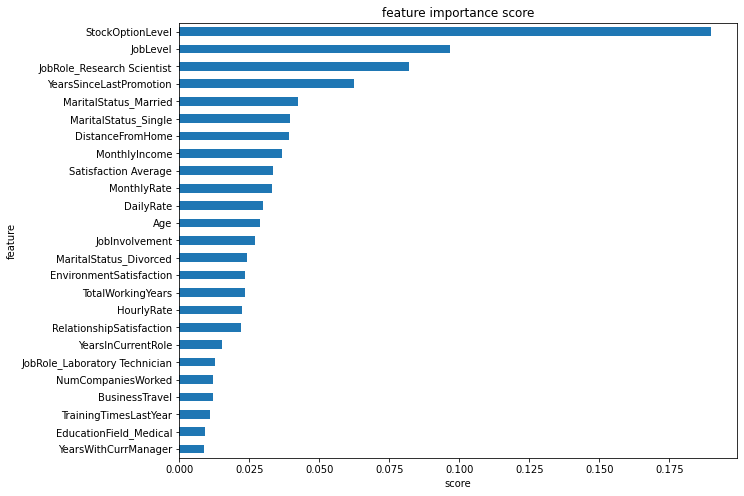

In [ ]:
show_feature_importance(model2)

### Shap

In [25]:
!pip install shap

     |████████████████████████████████| 564 kB 5.2 MB/s 


In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_over_SMOTE, y_over_SMOTE)

DecisionTreeClassifier()

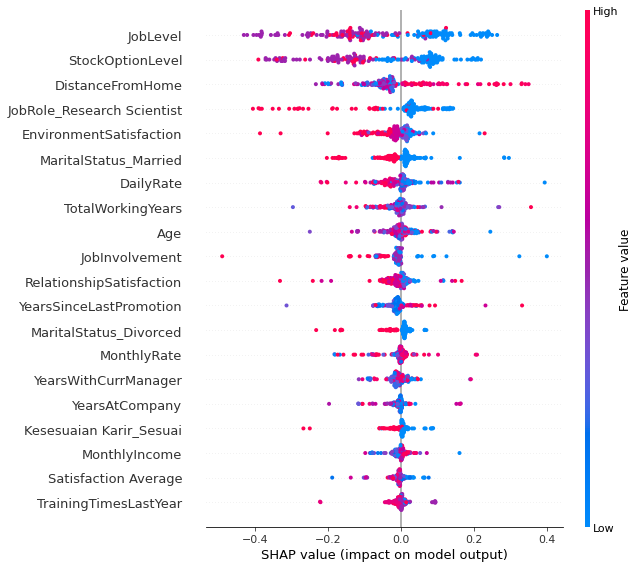

In [26]:
import shap
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values[1], x_test)

In [27]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0:1], x_test.iloc[0,:])

## Feature Importance

In [28]:
x = dfs[['MonthlyIncome', 'Age', 'DistanceFromHome', 'TotalWorkingYears', 'StockOptionLevel']]
y = dfs['Attrition'].values
print(x.shape)
print(y.shape)

(925, 5)
(925,)


Accuracy = 0.68
Recall = 0.21



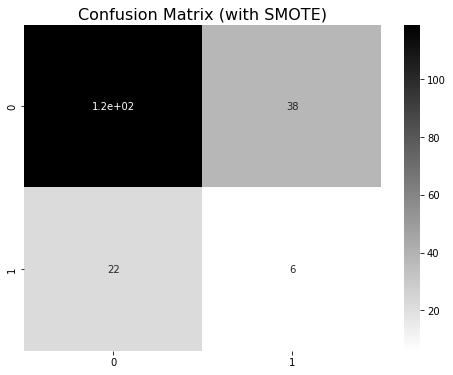

In [37]:
#confusion matrix pake decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

dt.fit(x_over_SMOTE, y_over_SMOTE)
preds = dt.predict(x_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='gist_yarg');

In [38]:
#function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
    print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [39]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_over_SMOTE, y_over_SMOTE)

DecisionTreeClassifier(random_state=42)

In [40]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_over_SMOTE, y_over_SMOTE)
eval_classification(dt)

Accuracy (Test Set): 0.68
Accuracy (Train Set): 1.00
Precision (Test Set): 0.14
Precision (Train Set): 1.00
Recall (Test Set): 0.21
Recall (Train Set): 1.00
F1-Score (Test Set): 0.17
F1-Score (Train Set): 1.00
AUC (test-proba): 0.49
AUC (train-proba): 1.00
AUC (test-label): 0.49
AUC (train-label): 1.00


In [41]:
print('Train score: ' + str(dt.score(x_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(dt.score(x_over_SMOTE, y_over_SMOTE))) #accuracy

Train score: 1.0
Test score:1.0


In [42]:
#Hyperparams decision tree
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 710, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100, 200, 220, 250] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50, 75, 90] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
rsc = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
rsc.fit(x_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
y_pred = rsc.predict(x_test)#Check performa dari model
eval_classification(rsc)

Accuracy (Test Set): 0.68
Accuracy (Train Set): 0.74
Precision (Test Set): 0.22
Precision (Train Set): 0.35
Recall (Test Set): 0.43
Recall (Train Set): 0.47
F1-Score (Test Set): 0.29
F1-Score (Train Set): 0.40
AUC (test-proba): 0.63
AUC (train-proba): 0.68
AUC (test-label): 0.58
AUC (train-label): 0.64


In [43]:
print('Train score: ' + str(rsc.score(x_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(rsc.score(x_over_SMOTE, y_over_SMOTE))) #accuracy

Train score: 0.5752066115702479
Test score:0.5752066115702479


In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 4.3 MB/s 


In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

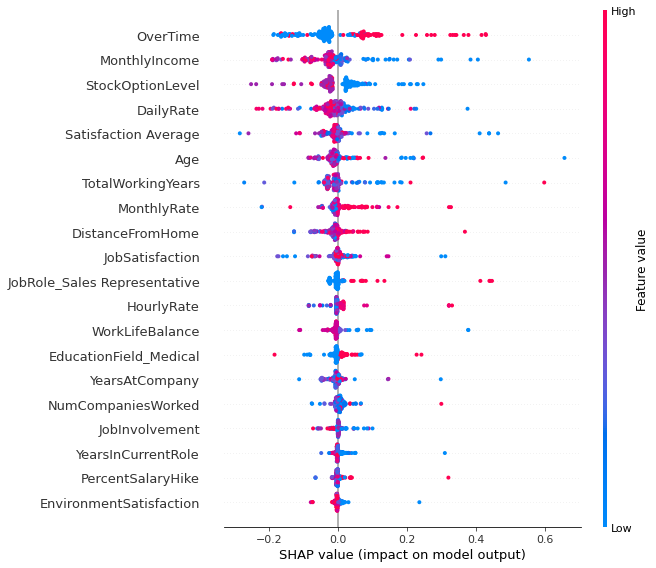

In [45]:
import shap
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values[1], x_test)

In [46]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0:1], x_test.iloc[0,:])